## Observations and Insights 

##### General observations 
# For the mouse selected, Capumulin reduces the tumor size at the end of the test. 
# From the box plots, Ramicane seems to reduce the tumor size sligtly more than Capumulin
# Linear correlation between mice weight and average tumor size (proportional).  

In [28]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# from sqlalchemy import create_engine
# engine = create_engine('postgresql://localhost:5432/HP_Homework')
# connection = engine.connect()



employees_path = "employees.csv"
departments_path = "departments.csv"
dept_emp_path= "dept_emp.csv"
dept_manager_path="dept_manager.csv"
salaries_path="salaries.csv"
titles_path="titles.csv"

#Reading the all the files
employees = pd.read_csv(employees_path)
departments = pd.read_csv(departments_path)
dept_emp=pd.read_csv(dept_emp_path)
dept_manager=pd.read_csv(dept_manager_path)
salaries=pd.read_csv(salaries_path)
titles=pd.read_csv(titles_path)



# # Combine the data into a single dataset

# study_results=pd.DataFrame(study_results)
# print(study_results)

# all=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# all 
# #Display the data table for preview
# all.tail()

In [51]:
salaries=pd.DataFrame(salaries)


In [55]:
salaries_grouped=salaries.groupby('salary').count()
salaries_grouped

,emp_no
salary,
40000,95346
40001,5
40002,10
40003,9
40004,9
...,...
125469,1
126703,1
127041,1


In [56]:
max_salary=salaries['salary'].max()
min_salary=salaries['salary'].min()
print(max_salary,min_salary)

129492 40000


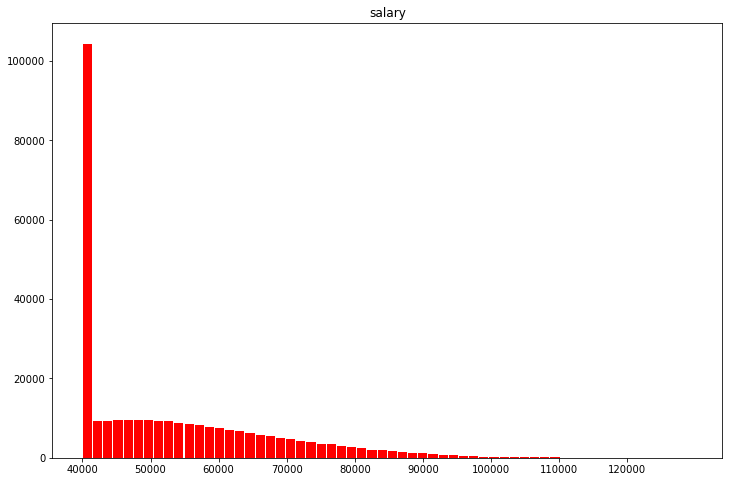

In [58]:
ax = salaries.hist(column='salary', bins=60, grid=False, figsize=(12,8), color='r', zorder=2, rwidth=0.9)

x_ticks = np.arange(40000, 130000, 10000)
plt.xticks(x_ticks)

plt.show()


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
##counting how many different type of "Timepoints" are

test=all.groupby("Mouse ID")
test_t=test["Timepoint"].value_counts() #this identifies how many times the value Timepoint is repeated
test_t=pd.DataFrame(test_t)
repeated=test_t.loc[test_t['Timepoint'] > 1] #So, if a Timepoint value is greater than 1, it means that is repeated at least once. 
repeated

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [3]:
look_repeated=all.loc[all["Mouse ID"] =="g989"] #will get a subset with only the repetitions for this mouse
indices_repeated =list(look_repeated.index) #obtaining the indexes to use them to drop rows by index
cleaned_df=all.drop(indices_repeated)

In [4]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Checking the number of mice in the clean DataFrame.
number_mices=cleaned_df[["Mouse ID"]].nunique()
number_mices

Mouse ID    248
dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

drug_regimen=all.groupby("Drug Regimen")

drug_regimen_tum=drug_regimen[["Tumor Volume (mm3)"]]

drug_regimen_mean=drug_regimen_tum.mean().round(2)
drug_regimen_mean=drug_regimen_mean.rename(columns={"Tumor Volume (mm3)":"Tum Vol Avg (mm3)"})

drug_regimen_med=drug_regimen_tum.median().round(2)
drug_regimen_med=drug_regimen_med.rename(columns={"Tumor Volume (mm3)":"Tum Vol Median"})

drug_regimen_var=drug_regimen_tum.var().round(2)
drug_regimen_var=drug_regimen_var.rename(columns={"Tumor Volume (mm3)":"Tum Vol Variance"})

drug_regimen_std=drug_regimen_tum.std().round(2)
drug_regimen_std=drug_regimen_std.rename(columns={"Tumor Volume (mm3)":"Std Dev"})

drug_regimen_sem=drug_regimen_tum.sem().round(2)
drug_regimen_sem=drug_regimen_sem.rename(columns={"Tumor Volume (mm3)":"SEM"})

sum_stats_regimen=pd.concat([drug_regimen_mean,drug_regimen_med,drug_regimen_var,drug_regimen_std,drug_regimen_sem], axis=1)
sum_stats_regimen = pd.DataFrame(sum_stats_regimen)
sum_stats_regimen


,Tum Vol Avg (mm3),Tum Vol Median,Tum Vol Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line

drug_regimen_tum=drug_regimen_tum.agg(["mean","median","var","std","sem"]).round(2)
drug_regimen_tum



Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.85  42.35  6.51  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

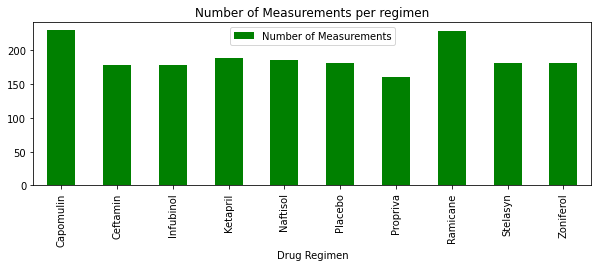

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measurements=drug_regimen[["Sex"]].count() #counting any column
measurements=measurements.rename(columns={"Sex":"Number of Measurements"})

measurements.plot(kind="bar", figsize=(10,3), color="g") #using pandas to plot a bar chart, green color.
plt.title("Number of Measurements per regimen") #setting title for the plot
plt.show()

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measurements


,Number of Measurements
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


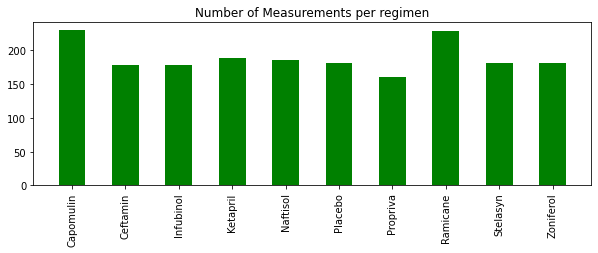

In [11]:
x_axis_dr=np.arange(len(measurements)) #generating a second plot
tick_locations = [value for value in x_axis_dr]

plt.figure(figsize=(10,3))
plt.bar(x_axis_dr, measurements["Number of Measurements"], color='g', alpha=1, align="center", width=.5)
plt.xticks(tick_locations, measurements.index, rotation="vertical")

# Set a Title and labels
plt.title("Number of Measurements per regimen")
plt.show()

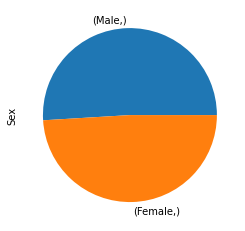

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender=(cleaned_df[["Sex"]].value_counts())

gender.plot(kind='pie', y='Sex').set_ylabel("Sex")

plt.show()


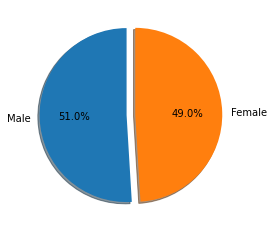

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]

explode = (0, 0.1) 

plt.pie(gender,labels=labels, explode=explode,shadow=True, startangle=90,autopct="%1.1f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = all[["Mouse ID","Timepoint"]]
timepoint=timepoint.groupby("Mouse ID").max().rename(columns={"Timepoint":"Last Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
timepoint=timepoint.reset_index()

timepoint_final= timepoint.merge(all,on="Mouse ID")
timepoint_final = timepoint_final.loc[(timepoint_final['Last Timepoint'] == timepoint_final['Timepoint'])]
timepoint_final
final_tv=timepoint_final[["Mouse ID","Drug Regimen","Sex","Weight (g)", "Tumor Volume (mm3)","Metastatic Sites"]].rename(columns={"Tumor Volume (mm3)":"FTV"})
final_tv



,Mouse ID,Drug Regimen,Sex,Weight (g),FTV,Metastatic Sites
9,a203,Infubinol,Female,23,67.973419,2
19,a251,Infubinol,Female,25,65.525743,1
29,a262,Placebo,Female,29,70.717621,4
39,a275,Ceftamin,Female,28,62.999356,3
46,a366,Stelasyn,Female,29,63.440686,1
...,...,...,...,...,...,...
1852,z435,Propriva,Female,26,48.710661,0
1862,z578,Ramicane,Male,16,30.638696,0
1872,z581,Infubinol,Female,25,62.754451,3
1882,z795,Naftisol,Female,29,65.741070,3


In [15]:

#filtering by treatment (using the loc function to filter by rows)
cap= final_tv.loc[(final_tv['Drug Regimen'] == "Capomulin")]
ram=final_tv.loc[(final_tv['Drug Regimen'] == "Ramicane")]
inf=final_tv.loc[(final_tv['Drug Regimen'] == "Infubinol")]
cef=final_tv.loc[(final_tv['Drug Regimen'] == "Ceftamin")]
                 
top2=cap.append(ram)
top3=top2.append(inf)
top4=top3.append(cef)
top4


    

,Mouse ID,Drug Regimen,Sex,Weight (g),FTV,Metastatic Sites
183,b128,Capomulin,Female,22,38.982878,2
216,b742,Capomulin,Male,21,38.939633,0
499,f966,Capomulin,Male,17,30.485985,0
522,g288,Capomulin,Male,19,37.074024,1
542,g316,Capomulin,Female,22,40.159220,2
...,...,...,...,...,...,...
1709,x226,Ceftamin,Male,28,45.000000,0
1749,x581,Ceftamin,Female,28,64.634949,3
1773,x822,Ceftamin,Male,29,61.386660,3
1825,y769,Ceftamin,Female,27,68.594745,4


In [16]:
quartiles = top4['FTV'].quantile([.25,.5,.75]) #getting quartiles at 25%, 50% and 75%
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of FTV is: {lowerq}")
print(f"The upper quartile of FTV is: {upperq}")
print(f"The interquartile range of FTV is: {iqr}")
print(f"The the median of FTV is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr) #using 1.5% of the IQR for bounds magnitude
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")




The lower quartile of FTV is: 37.187743802499995
The upper quartile of FTV is: 59.930261755000004
The interquartile range of FTV is: 22.74251795250001
The the median of FTV is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [17]:
outliers = top4.loc[(top4["FTV"] <lower_bound) | (top4["FTV"] > upper_bound)]
outliers # the table below will show any outliers for the entire dataset


,Mouse ID,Drug Regimen,Sex,Weight (g),FTV,Metastatic Sites


In [18]:
#there are not clear outliers analytically. let's check the plots

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

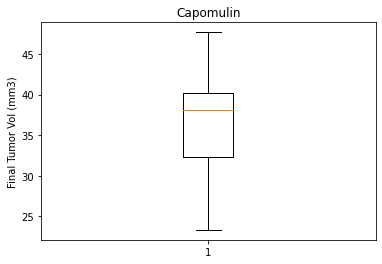

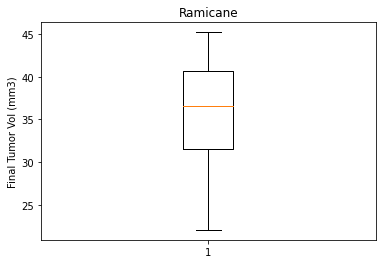

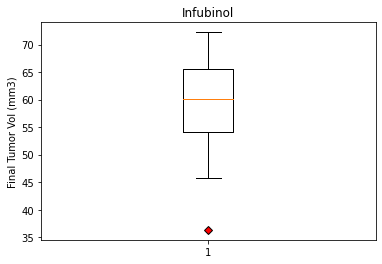

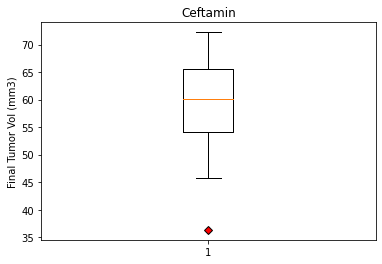

In [20]:
red_diamond = dict(markerfacecolor='r', marker='D')

cap_ftv=cap["FTV"]

fig1, ax1 = plt.subplots()
ax1.set_title("Capomulin")
ax1.set_ylabel("Final Tumor Vol (mm3)")
ax1.boxplot(cap_ftv)

ram_ftv=ram["FTV"]

fig1, ax1 = plt.subplots()
ax1.set_title("Ramicane")
ax1.set_ylabel("Final Tumor Vol (mm3)")
ax1.boxplot(ram_ftv)


inf_ftv=inf["FTV"]

fig1, ax1 = plt.subplots()
ax1.set_title("Infubinol")
ax1.set_ylabel("Final Tumor Vol (mm3)")
ax1.boxplot(inf_ftv,flierprops=red_diamond)

cef_ftv=inf["FTV"]

fig1, ax1 = plt.subplots()
ax1.set_title("Ceftamin")
ax1.set_ylabel("Final Tumor Vol (mm3)")
ax1.boxplot(cef_ftv,flierprops=red_diamond)

plt.show()



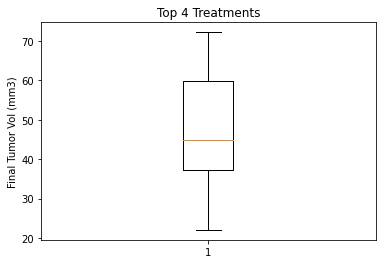

In [21]:
top4_FTV=top4["FTV"]
fig1, ax1 = plt.subplots()
ax1.set_title("Top 4 Treatments")
ax1.set_ylabel("Final Tumor Vol (mm3)")
ax1.boxplot(top4_FTV)
plt.show()

#There are not outliers among the 4 top treatments but there are outliers in the Ceftamin and Infubinol regimens

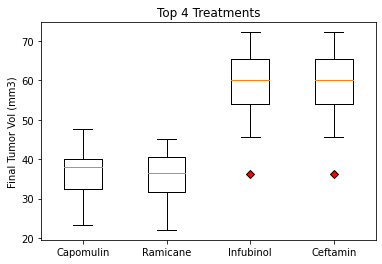

In [22]:
combined=[cap_ftv,ram_ftv,inf_ftv,cef_ftv]
fig1, ax1 = plt.subplots()
ax1.set_title("Top 4 Treatments")
ax1.set_ylabel("Final Tumor Vol (mm3)")
ax1.boxplot(combined,flierprops=red_diamond)
plt.xticks([1, 2, 3,4], ['Capomulin','Ramicane','Infubinol' ,'Ceftamin'])
plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


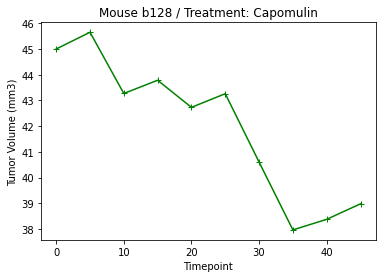

In [24]:

single_mouse=all.loc[(all["Mouse ID"]=="b128")]
single_mouse

x_axis=single_mouse["Timepoint"]
y_axis=single_mouse["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, color="green",marker="+")
plt.title("Mouse b128 / Treatment: Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

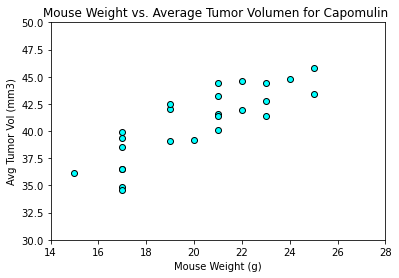

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


avgtumor = all[["Mouse ID","Tumor Volume (mm3)"]]
avgtumor=avgtumor.groupby("Mouse ID").mean().rename(columns={"Tumor Volume (mm3)":"Avg Tum Vol (mm3)"})
#avgtumor

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
avgtumor=avgtumor.reset_index()

avgtumor_final= avgtumor.merge(all,on="Mouse ID")


capw= avgtumor_final.loc[(avgtumor_final['Drug Regimen'] == "Capomulin")]
capw=capw.groupby("Mouse ID").first()

x=capw["Weight (g)"]
y=capw["Avg Tum Vol (mm3)"]

plt.scatter(x, y, marker="o", facecolors="cyan", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Volumen for Capomulin ")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")
plt.xlim(14,28)
plt.ylim(30,50)
plt.show()

## Correlation and Regression

The correlation coefficient between malic acid and flavanoids is 0.84
The R^2 is: 0.7089


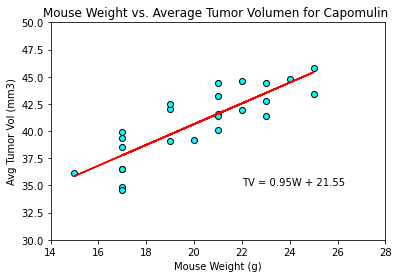

'TV = 0.95W + 21.55'

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(x,y)[0],2)}")



plt.scatter(x, y, marker="o", facecolors="cyan", edgecolors="black")
plt.title("Mouse Weight vs. Average Tumor Volumen for Capomulin ")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Vol (mm3)")
plt.xlim(14,28)
plt.ylim(30,50)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "TV = " + str(round(slope,2)) + "W + " + str(round(intercept,2))

print(f"The R^2 is: {round(rvalue**2,4)}")

plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(22,35),fontsize=10,color="black") # 20,35 are the coordinates for the equation to show


plt.show()
line_eq
